In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

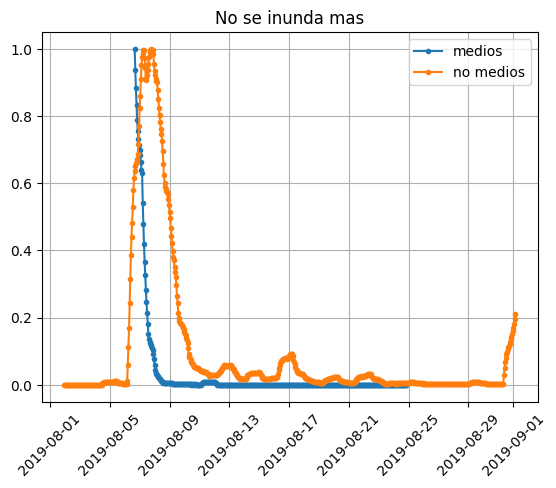

In [11]:
path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/'
df_clus_completo = pd.read_csv(path_git+'Tweets_cluster_con_RT/no_se_inunda_mas_Macri.csv')

df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')

categoria = 'medios'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = [categoria, 'no '+categoria]
root = 'No se inunda mas'
plt.figure()
plt.title(root)
for i, df in enumerate(df_categoria):
    df_index = df.set_index('Fecha')
    df_count_hora = df_index.resample('1H').count()
    #plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'sin rolling window'+str(i)) #Test comparation
    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')

plt.legend()
plt.grid(0.7)
#plt.xlim([datetime(2019, 8, 4), datetime(2019, 8, 15)])
plt.xticks(rotation=45)

plt.show()